### Loading the Dataset and installing necessary pacakages

In [ ]:
!pip3 install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 12.9 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset("surrey-nlp/PLOD-CW")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

## Creating different Dataframes for  further represenatation

In [ ]:
df = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])
df_valid =pd.DataFrame(dataset['validation'])

# **Represenation Of Different Dataset**

## Plot1 - A Histogram to represent to analyze the distribution of tokens as per their length.

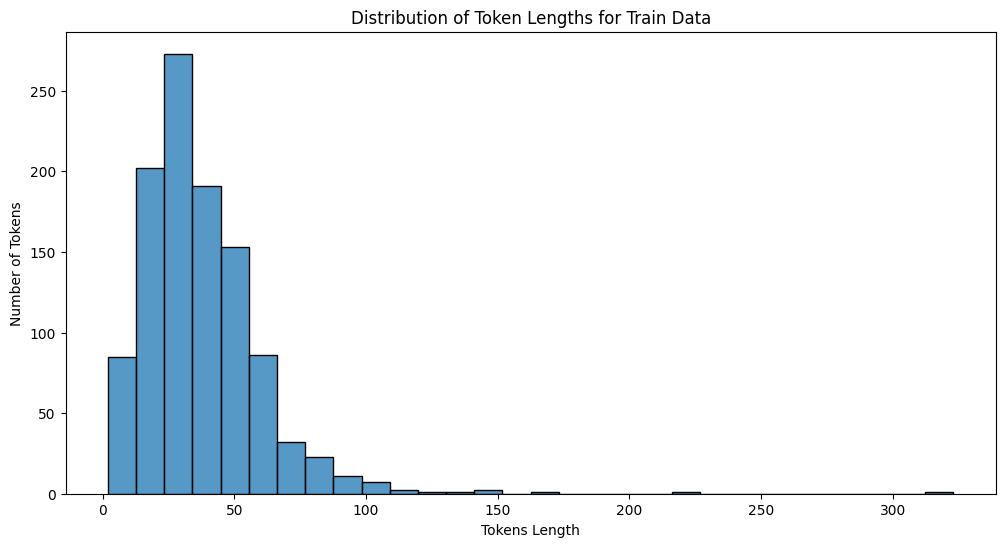

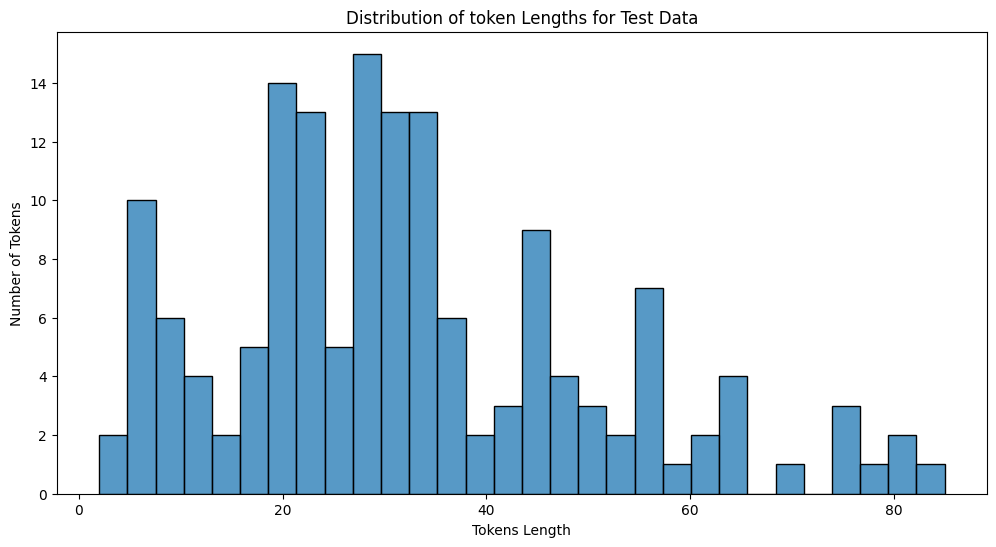

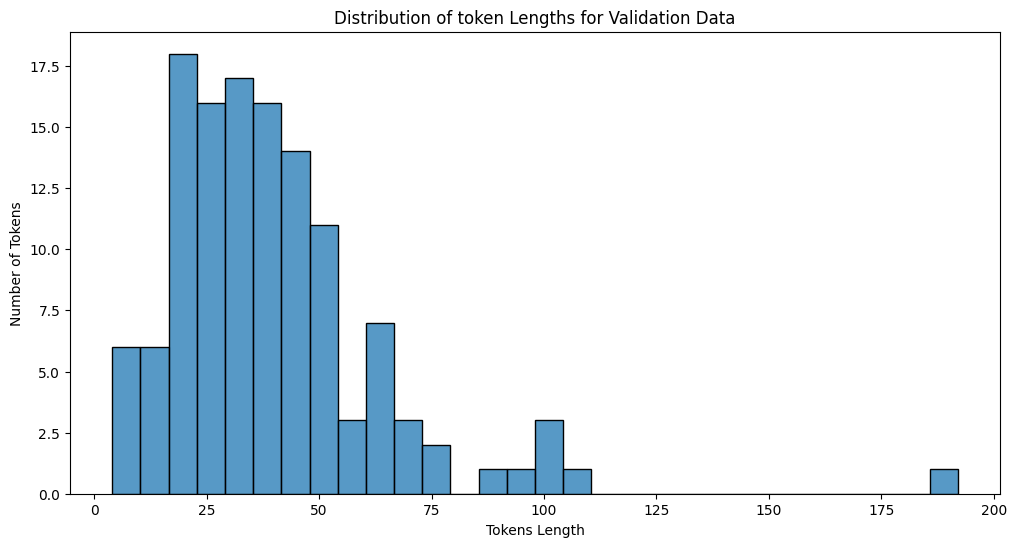

In [ ]:

# Plotting sentence lengths distribution of  Train Dataset
token_lengths_train = df['tokens'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(token_lengths_train, bins=30, kde=False)
plt.title('Distribution of Token Lengths for Train Data')
plt.xlabel('Tokens Length')
plt.ylabel('Number of Tokens')
plt.show()

# Plotting sentence lengths distribution of  Test Dataset
token_lengths_test = df_test['tokens'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(token_lengths_test, bins=30, kde=False)
plt.title('Distribution of token Lengths for Test Data')
plt.xlabel('Tokens Length')
plt.ylabel('Number of Tokens')
plt.show()

# Plotting sentence lengths distribution of  Validation Dataset
token_lengths_valid = df_valid['tokens'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(token_lengths_valid, bins=30, kde=False)
plt.title('Distribution of token Lengths for Validation Data')
plt.xlabel('Tokens Length')
plt.ylabel('Number of Tokens')
plt.show()

## Plot2 - A Bar Chart that represent the frequency of occurence of different NER tags in Train ,Test and Validation Dataset

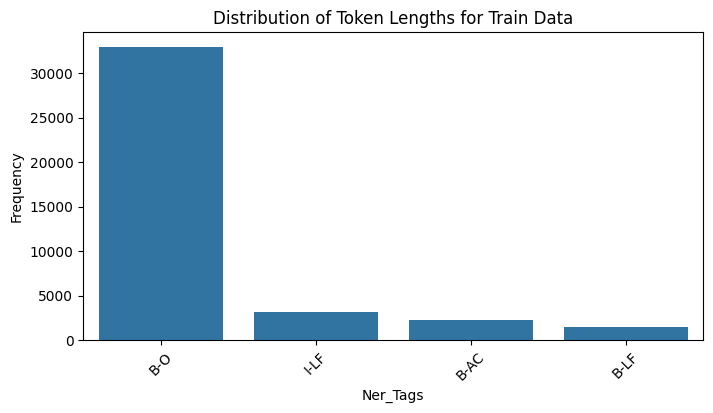

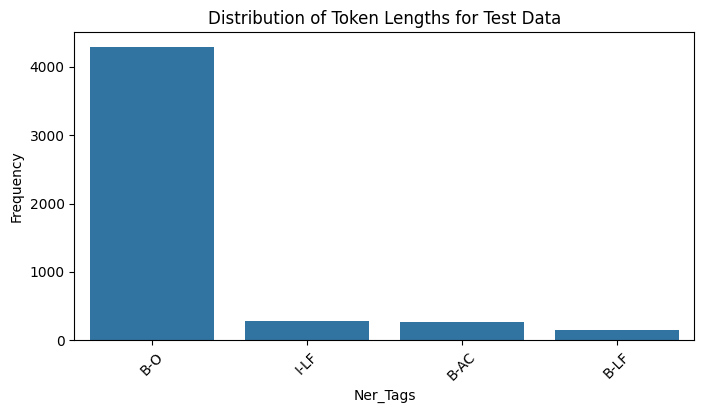

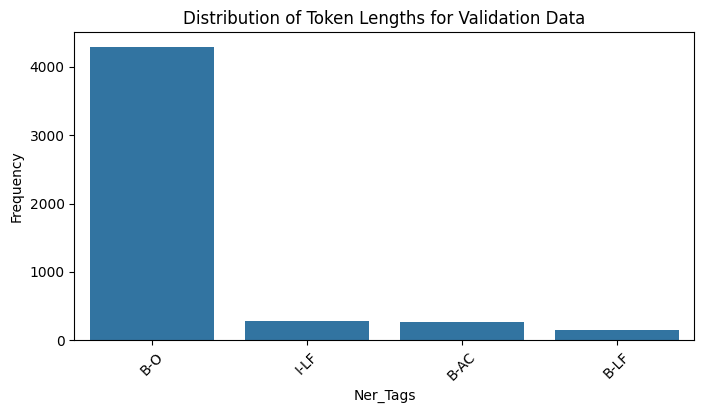

In [ ]:
Ner_tags = [tag for sublist in df['ner_tags'] for tag in sublist]
tag_counts = Counter(Ner_tags)

# Convert tag counts to a DataFrame
tag_df = pd.DataFrame(list(tag_counts.items()), columns=['Ner_Tag', 'Count']).sort_values('Count', ascending=False)

# Bar plot for tag counts for train dataset
plt.figure(figsize=(8, 4))
sns.barplot(x='Ner_Tag', y='Count', data=tag_df)
plt.title('Distribution of Token Lengths for Train Data')
plt.xlabel('Ner_Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Ner_tags_test = [tag for sublist in df_test['ner_tags'] for tag in sublist]
tag_counts_test = Counter(Ner_tags_test)


tag_df = pd.DataFrame(list(tag_counts_test.items()), columns=['Ner_Tag', 'Count']).sort_values('Count', ascending=False)

# Bar plot for tag counts for test dataset
plt.figure(figsize=(8, 4))
sns.barplot(x='Ner_Tag', y='Count', data=tag_df)
plt.title('Distribution of Token Lengths for Test Data')
plt.xlabel('Ner_Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Ner_tags_valid = [tag for sublist in df_test['ner_tags'] for tag in sublist]
tag_counts_valid = Counter(Ner_tags_valid)

# Bar plot for tag counts for Validation dataset
tag_df = pd.DataFrame(list(tag_counts_valid.items()), columns=['Ner_Tag', 'Count']).sort_values('Count', ascending=False)

# Bar plot for tag counts
plt.figure(figsize=(8, 4))
sns.barplot(x='Ner_Tag', y='Count', data=tag_df)
plt.title('Distribution of Token Lengths for Validation Data')
plt.xlabel('Ner_Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

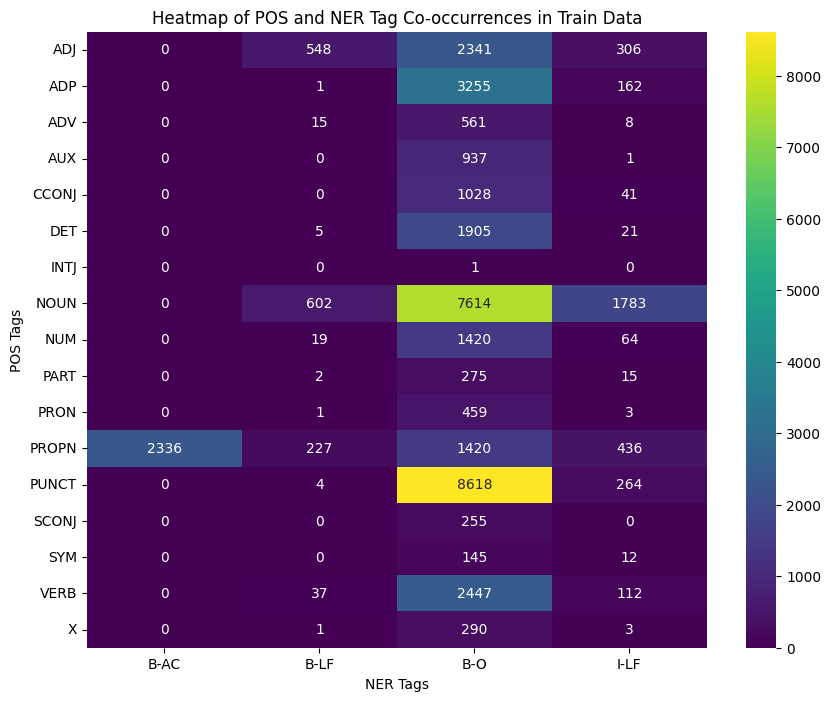

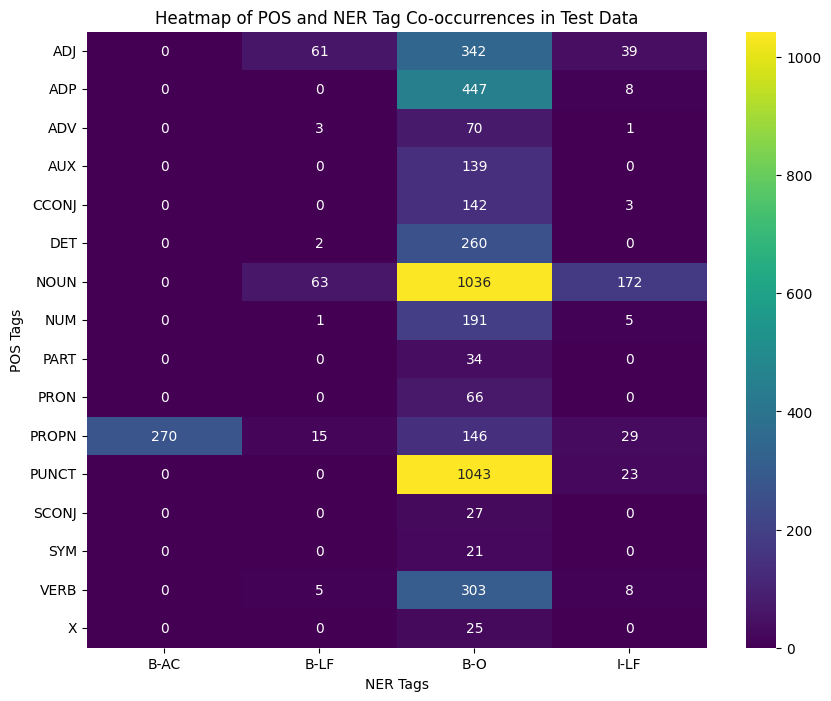

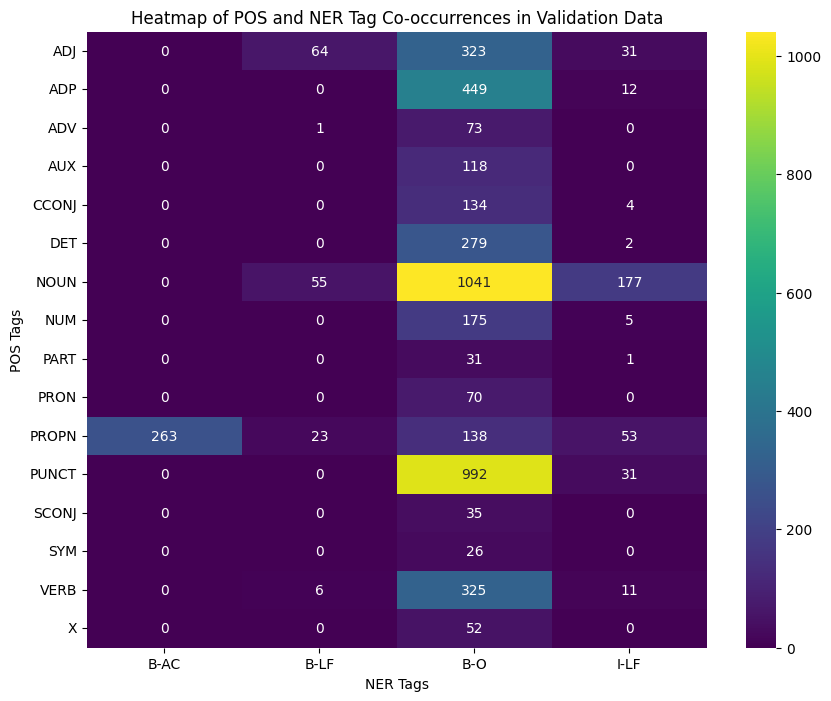

In [ ]:
import numpy as np

# Creating co-occurrence matrix for POS and NER tags
tag_matrix_train = pd.DataFrame(0, index=np.unique([obj for sublist in df['pos_tags'] for obj in sublist]), columns=np.unique([obj for sublist in df['ner_tags'] for obj in sublist]))

for pos_list, ner_list in zip(df['pos_tags'], df['ner_tags']):
    for pos, ner in zip(pos_list, ner_list):
        tag_matrix_train.loc[pos, ner] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(tag_matrix_train, annot=True, fmt="d", cmap='viridis')
plt.title('Heatmap of POS and NER Tag Co-occurrences in Train Data')
plt.xlabel('NER Tags')
plt.ylabel('POS Tags')
plt.show()

# Create a co-occurrence matrix for POS and NER tags (Test Dataset)
tag_matrix_test = pd.DataFrame(0, index=np.unique([obj for sublist in df_test['pos_tags'] for obj in sublist]), columns=np.unique([obj for sublist in df_test['ner_tags'] for obj in sublist]))

for pos_list, ner_list in zip(df_test['pos_tags'], df_test['ner_tags']):
    for pos, ner in zip(pos_list, ner_list):
        tag_matrix_test.loc[pos, ner] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(tag_matrix_test, annot=True, fmt="d", cmap='viridis')
plt.title('Heatmap of POS and NER Tag Co-occurrences in Test Data')
plt.xlabel('NER Tags')
plt.ylabel('POS Tags')
plt.show()

# Create a co-occurrence matrix for POS and NER tags for Validation Dataset
tag_matrix_valid = pd.DataFrame(0, index=np.unique([obj for sublist in df_valid['pos_tags'] for obj in sublist]), columns=np.unique([obj for sublist in df_valid['ner_tags'] for obj in sublist]))

for pos_list, ner_list in zip(df_valid['pos_tags'], df_valid['ner_tags']):
    for pos, ner in zip(pos_list, ner_list):
        tag_matrix_valid.loc[pos, ner] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(tag_matrix_valid, annot=True, fmt="d", cmap='viridis')
plt.title('Heatmap of POS and NER Tag Co-occurrences in Validation Data')
plt.xlabel('NER Tags')
plt.ylabel('POS Tags')
plt.show()